# 1. Ensemble learning



*  **Bagging** (*Mục tiêu là giảm variance - áp dụng cho các model đã có sẵn bias thấp và đang bị variance cao:*):
Xây dựng một lượng lớn các model (thường là cùng loại) trên những subsamples khác nhau từ tập training dataset (random sample trong 1 dataset để tạo 1 dataset mới). Những model này sẽ được train độc lập và song song với nhau nhưng đầu ra của chúng sẽ được trung bình cộng để cho ra kết quả cuối cùng.

---


*   **Boosting** (*Mục tiêu là giảm bias - áp dụng cho các model có variance thấp và bị bias cao*): Xây dựng một lượng lớn các model (thường là cùng loại). Mỗi model sau sẽ học cách sửa những errors của model trước (dữ liệu mà model trước dự đoán sai) -> tạo thành một chuỗi các model mà model sau sẽ tốt hơn model trước bởi trọng số được update qua mỗi model (cụ thể ở đây là trọng số của những dữ liệu dự đoán đúng sẽ không đổi, còn trọng số của những dữ liệu dự đoán sai sẽ được tăng thêm) . Chúng ta sẽ lấy kết quả của model cuối cùng trong chuỗi model này làm kết quả trả về.


---


* **Stacking** (*Mục tiêu là giảm bias - áp dụng cho các model có variance thấp và bị bias cao*): Xây dựng một số model (thường là khác loại) và một meta model (supervisor model), train những model này độc lập, sau đó meta model sẽ học cách kết hợp kết quả dự báo của một số mô hình một cách tốt nhất.



# 2. Classification for ensemble

## Bagging

**Bootstrapping:**
Lấy mẫu ngẫu nhiên bộ mẫu ban đầu N có hoàn lại sinh ra bộ mẫu B có cùng kích thước với bộ mẫu ban đầu, còn lấy mẫu không hoàn lại người ta gọi là pasting.

(40, 2)

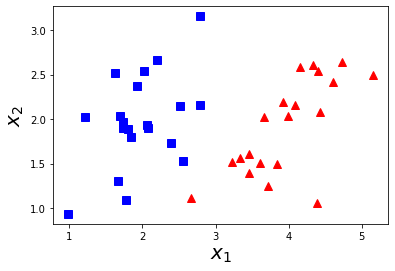

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
np.random.seed(2022)
means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 20
x_1 = np.random.multivariate_normal(means[0], cov, N)
x_2 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((x_1, x_2), axis = 0)
y = [0] * N + [1] * N
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
plt.plot(X[N:, 0], X[N:, 1], 'r^', markersize = 8)
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
X.shape

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    bootstrap=True, random_state=42)
bag_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=42)

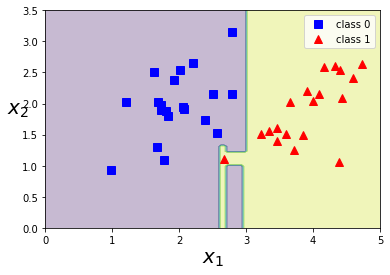

In [ ]:
def plot_boundary(clf):
  plt.axis([0,5,0,3.5])
  x1s = np.linspace(0, 5, 100)
  x2s = np.linspace(0, 3.5, 100)
  #Tạo lưới bao figure x1,x2 dim R^100x100
  x1, x2 = np.meshgrid(x1s, x2s)
  #ravel để tách mảng thành 1 hàng R^1x10000
  #c_ để ghép 2 mảng thành R^10000x2
  X_new = np.c_[x1.ravel(), x2.ravel()]
  #y_pred mảng 1 chiều chuyển về dạng R^100x100 để vẽ countour
  y_pred = clf.predict(X_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, alpha=0.3)
  plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8,label='class 0')
  plt.plot(X[N:, 0], X[N:, 1], 'r^', markersize = 8,label='class 1')
  plt.xlabel("$x_1$",fontsize=20)
  plt.ylabel("$x_2$",fontsize=20,rotation=0)
  plt.legend()
plot_boundary(bag_clf)

## Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
past_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    bootstrap=False, random_state=42, n_jobs=-1)
past_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=200, n_jobs=-1, random_state=42)

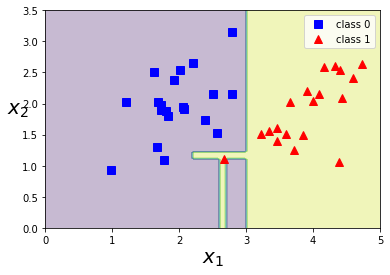

In [ ]:
  plot_boundary(past_clf)

## Out of bags

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=200,
    bootstrap=True, oob_score=True, random_state=42)
bag_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  oob_score=True, random_state=42)

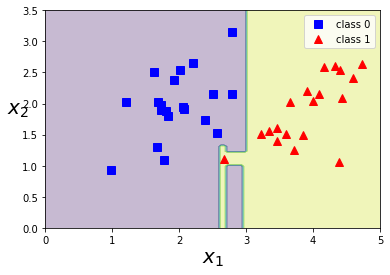

In [ ]:
plot_boundary(bag_clf)

## Random Forest

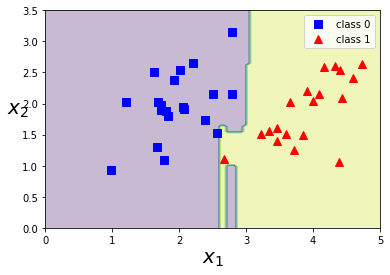

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranf_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, random_state=42)
ranf_clf.fit(X, y)
plot_boundary(ranf_clf)

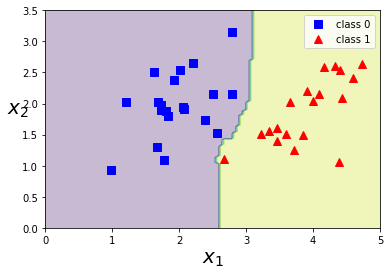

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=200, bootstrap=True,random_state=42,n_jobs=-1)
bag_clf.fit(X, y)
plot_boundary(bag_clf)

## Ada Boosting

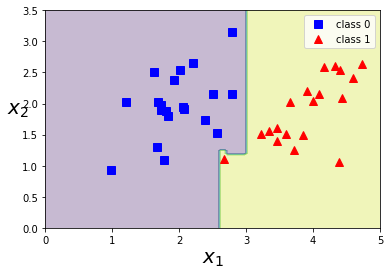

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X, y)
plot_boundary(ada_clf)

## Gradient Boosting

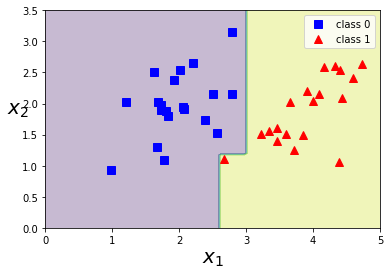

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(max_depth=2,n_estimators=200,learning_rate=0.05,random_state=42)
gbc.fit(X, y)
plot_boundary(gbc)

## XGBoosting

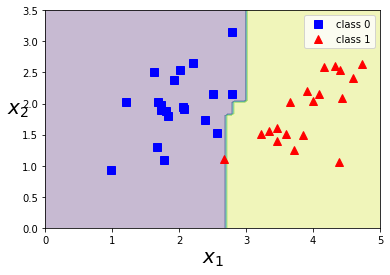

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X,y)
plot_boundary(xgb_clf)

## Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
stack_clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stack_clf.fit(X,y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

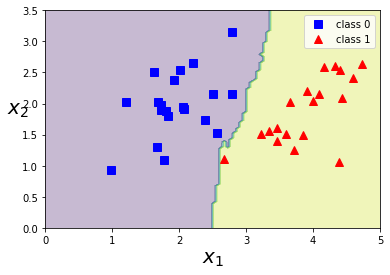

In [ ]:
plot_boundary(stack_clf)

## Voting Classifier

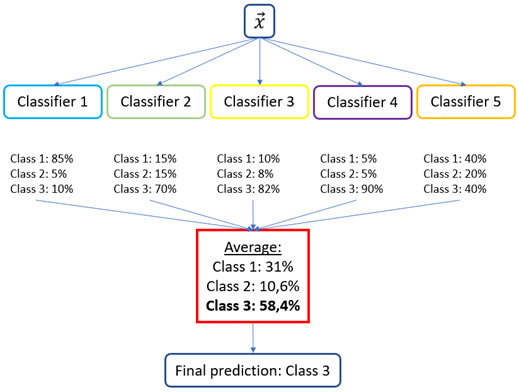

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
ranf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

In [ ]:
model=list()
model.append(('lr',log_clf))
model.append(('rf',ranf_clf))
model.append(('svc',svm_clf))

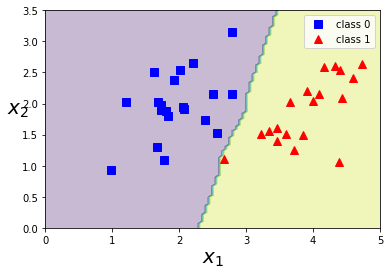

In [ ]:
voting_clf = VotingClassifier(estimators=model,voting='hard')
voting_clf.fit(X,y)
plot_boundary(voting_clf)

# 3. Regression for ensemble

## Bagging and pasting regression

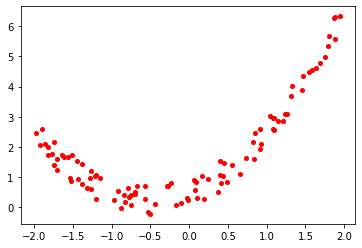

In [ ]:
np.random.seed(42)
X=4*np.random.rand(100,1)-2
y=X**2+X+np.random.rand(100,1)
plt.plot(X,y,'ro',markersize=4)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg=BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
    bootstrap=True, random_state=42)
bag_reg.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

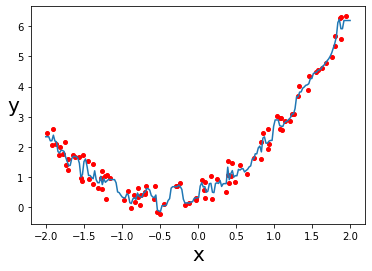

In [ ]:
def plot_regression(reg):
  x1 = np.linspace(-2, 2, 200).reshape(-1, 1)
  y_pred = reg.predict(x1)
  plt.plot(X,y,'ro',markersize=4)
  plt.plot(x1, y_pred)
  plt.xlabel('x',fontsize=20)
  plt.ylabel('y',fontsize=20,rotation=0)
plot_regression(bag_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


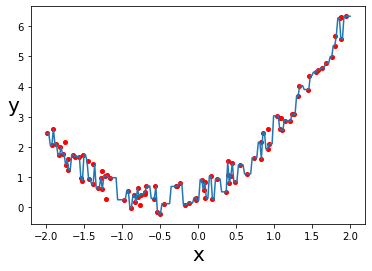

In [ ]:
past_reg=BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
    bootstrap=False, random_state=42)
past_reg.fit(X,y)
plot_regression(past_reg)

## Random Forest Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


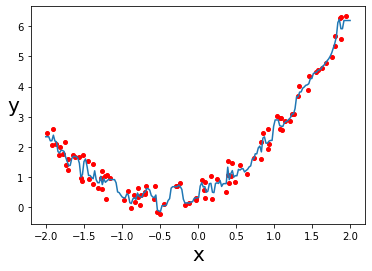

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ranf_reg=RandomForestRegressor(random_state=42)
ranf_reg.fit(X,y)
plot_regression(ranf_reg)

># **Boosting for regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


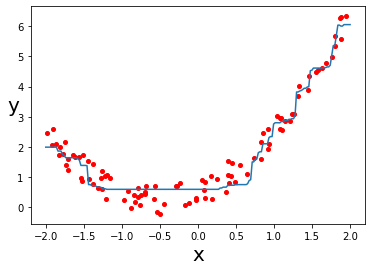

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor(learning_rate=0.1, random_state=42)
ada_reg.fit(X, y)
plot_regression(ada_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


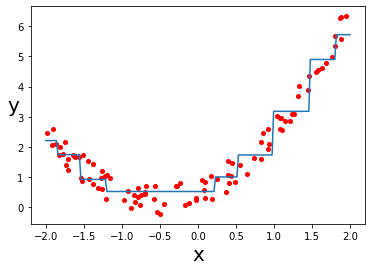

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.8, random_state=42)
gbr.fit(X, y)
plot_regression(gbr)

[13:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


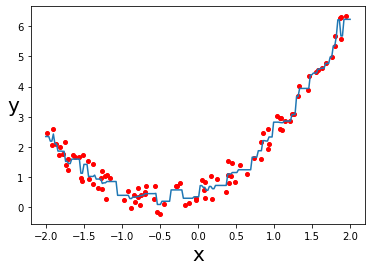

In [ ]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor()
xgb_reg.fit(X,y)
plot_regression(xgb_reg)

## Stacking for regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


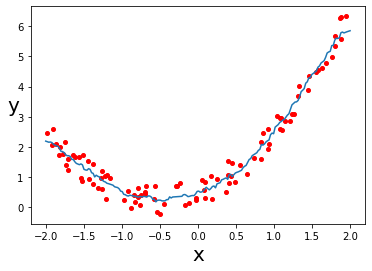

In [ ]:
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level1 = LinearRegression()
stack_reg = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
stack_reg.fit(X,y)
plot_regression(stack_reg)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [ ]:
model=list()
model.append(('linear',LinearRegression()))
model.append(('tre_reg',DecisionTreeRegressor()))
model.append(('svr',SVR()))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


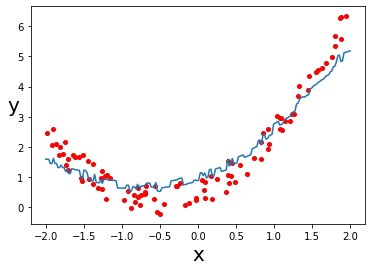

In [ ]:
voting_reg = VotingRegressor(estimators=model)
voting_reg.fit(X,y)
plot_regression(voting_reg)